In [48]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix

sns.set_style('darkgrid')
warnings.filterwarnings('ignore')


In [49]:
''' reading dataset '''
df = pd.read_csv('C:/Users/Mohan/Documents/Deep Learning R_27.07.21/Deep Learning R_27.07.21/Deep Learning Projects 7 - Advanced Churn Modeling/Churn_Modelling.csv')


In [50]:
''' displaying first 5 rows '''
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [51]:
''' shape of data '''
df.shape


(10000, 14)

In [52]:
''' chcecking null values '''
df.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [53]:
''' checking info '''
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


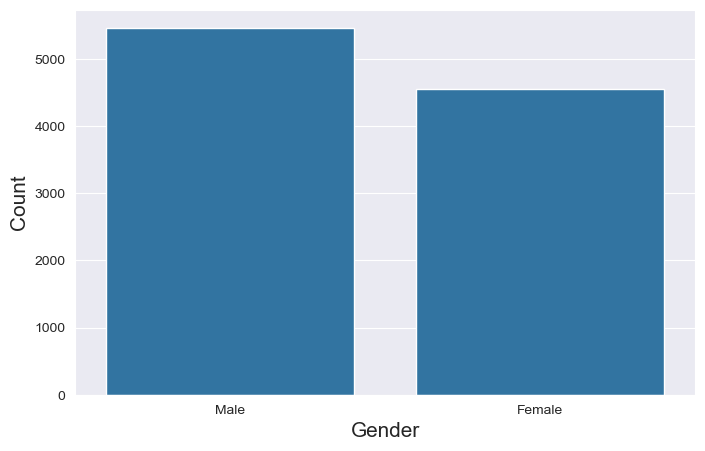

In [54]:
''' value counts of Gender '''
gender_lbl = df.Gender.value_counts()

''' barplot '''
plt.figure(figsize=(8, 5))
sns.barplot(gender_lbl);
plt.xlabel('Gender', fontsize=15);
plt.ylabel('Count', fontsize=15);


In [55]:
''' dropping some rows '''
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)


In [56]:
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [57]:
df['Gender'] = np.where(df['Gender'] == 'Male', 1, 0)


In [58]:
''' independent and dependent features '''
X = df.iloc[:, :10]
y = df.iloc[:, 10]


In [59]:
X.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10


In [60]:
y.head()


0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [61]:
''' one-hot encoding of gender column '''


' one-hot encoding of gender column '

In [62]:
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [63]:
''' unique value in geography '''
df.Geography.unique()


array(['France', 'Spain', 'Germany'], dtype=object)

In [64]:
''' dummies values '''
geography = pd.get_dummies(X["Geography"], drop_first=True)


In [65]:
''' concatenating geography and X '''
X = pd.concat([X, geography], axis=1)


In [66]:
X.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,False,False
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,False,True
2,502,France,0,42,8,159660.80,3,1,0,113931.57,False,False
3,699,France,0,39,1,0.00,2,0,0,93826.63,False,False
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,False,True


In [67]:
''' dropping Geography column '''
X.drop(['Geography'], axis=1, inplace=True)


In [68]:
''' final data '''
X.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,False,True


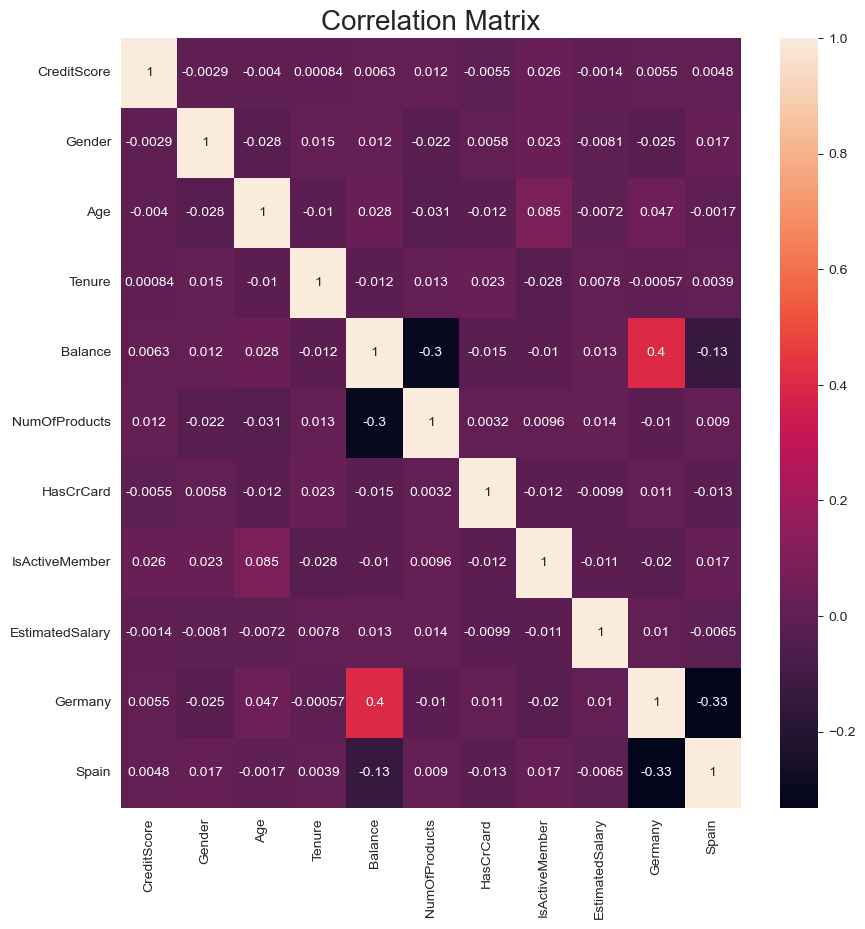

In [69]:
''' correlation matrix '''
plt.figure(figsize=(10, 10))
sns.heatmap(X.corr(numeric_only=True), annot=True)
plt.title('Correlation Matrix', fontsize=20);


In [70]:
''' train test split '''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [71]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)


X_train shape:  (7500, 11)
X_test shape:  (2500, 11)


In [72]:
''' Scaling '''
min_max_sc = MinMaxScaler()

X_train = min_max_sc.fit_transform(X_train)
X_test = min_max_sc.fit_transform(X_test)


In [73]:
X_train


array([[0.458     , 0.        , 0.31343284, ..., 0.02909988, 1.        ,
        0.        ],
       [0.8       , 0.        , 0.20895522, ..., 0.4780451 , 0.        ,
        0.        ],
       [0.758     , 0.        , 0.23880597, ..., 0.21424241, 0.        ,
        1.        ],
       ...,
       [0.776     , 1.        , 0.25373134, ..., 0.90717809, 0.        ,
        0.        ],
       [0.48      , 0.        , 0.29850746, ..., 0.74376393, 0.        ,
        1.        ],
       [0.546     , 0.        , 0.44776119, ..., 0.59427515, 1.        ,
        0.        ]])

In [74]:
X_test


array([[0.47835052, 0.        , 0.22972973, ..., 0.9643884 , 1.        ,
        0.        ],
       [0.3257732 , 0.        , 0.2972973 , ..., 0.64344406, 0.        ,
        0.        ],
       [0.70309278, 0.        , 0.32432432, ..., 0.37843669, 0.        ,
        1.        ],
       ...,
       [0.97938144, 0.        , 0.28378378, ..., 0.42223968, 0.        ,
        0.        ],
       [0.64742268, 1.        , 0.27027027, ..., 0.23230165, 1.        ,
        0.        ],
       [0.7628866 , 1.        , 0.17567568, ..., 0.36440547, 0.        ,
        0.        ]])

In [75]:
''' Model '''

''' container '''
model = Sequential()

''' 1st Hidden Layer '''
model.add(Dense(units = 6, kernel_initializer='he_uniform',activation='relu',input_dim = 11))

''' 2nd Hidden Layer '''
model.add(Dense(units = 6, kernel_initializer='he_uniform', activation='relu'))

''' Classification Layer '''
model.add(Dense(units = 1, kernel_initializer='glorot_uniform', activation='sigmoid'))


In [76]:
''' lets see how model looks like '''
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

In [77]:
''' compile the model '''
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [78]:
''' training '''
history = model.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs= 100)


Epoch 1/100
503/503 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8030 - loss: 0.5254 - val_accuracy: 0.7973 - val_loss: 0.4950
Epoch 2/100
503/503 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7900 - loss: 0.4962 - val_accuracy: 0.7973 - val_loss: 0.4776
Epoch 3/100
503/503 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8006 - loss: 0.4756 - val_accuracy: 0.7973 - val_loss: 0.4693
Epoch 4/100
503/503 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7938 - loss: 0.4723 - val_accuracy: 0.7985 - val_loss: 0.4647
Epoch 5/100
503/503 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8019 - loss: 0.4552 - val_accuracy: 0.7989 - val_loss: 0.4607
Epoch 6/100
503/503 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8022 - loss: 0.4559 - val_accuracy: 0.7985 - val_loss: 0.4576
Epoch 7/100
503/503 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7980 - loss: 0.4557 - val_accuracy: 0.8009 - val_loss: 0.4545
Epoch 8/100
503/503 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8158 - loss: 0.4366 - val_accu

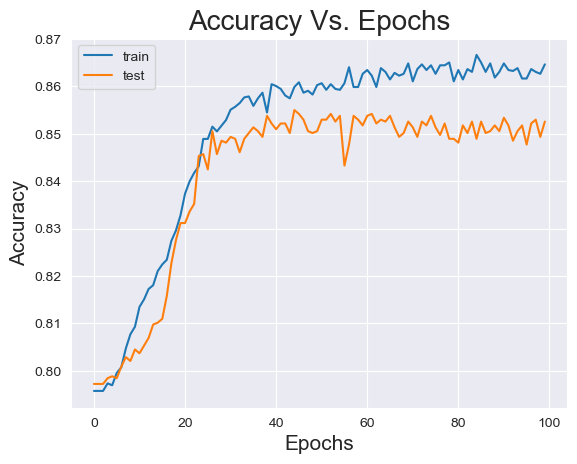

In [79]:
''' training accuracy and validation accuracy graph '''
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Vs. Epochs', fontsize=20)
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.legend(['train', 'test'], loc='upper left');


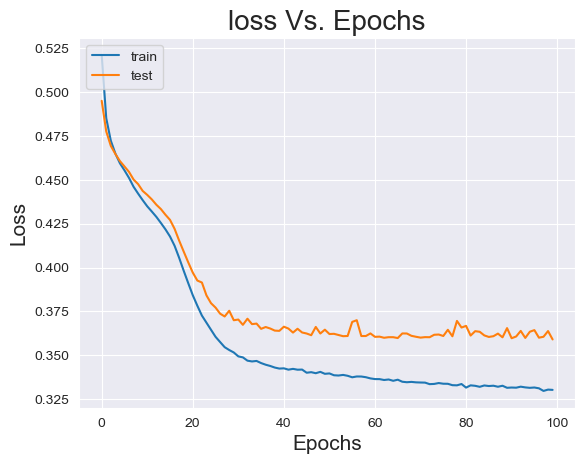

In [80]:
''' training loss and validation loss graph '''
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss Vs. Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.legend(['train', 'test'], loc='upper left');


In [81]:
''' prediction '''
pred = model.predict(X_test)


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [82]:
preds = []

for p in pred:
    if p > 0.5:
        preds.append(1)
    else:
        preds.append(0)


In [83]:
pd.DataFrame({
    'Actual': y_test, 
    'Predicted': preds
}).head(50)


,Actual,Predicted
9394,0,0
898,1,0
2398,0,0
5906,0,0
2343,0,0
8225,1,1
5506,0,0
6451,0,0
2670,1,1
3497,1,1


In [84]:
print("Accuracy Score: ", accuracy_score(y_test, preds))


Accuracy Score:  0.8612


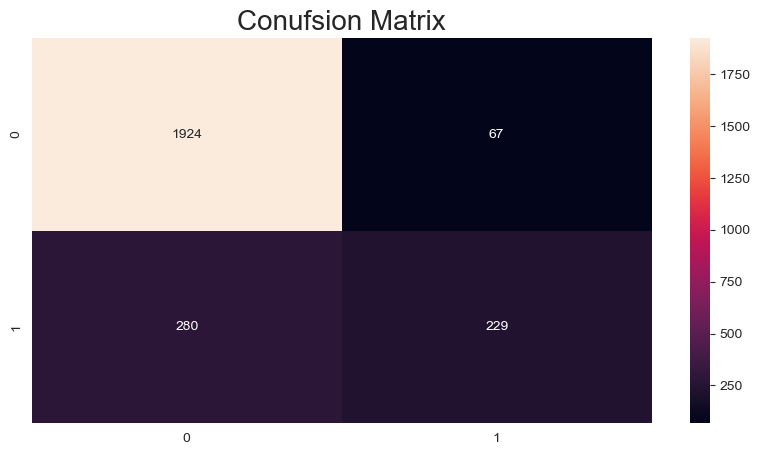

In [85]:
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='g');
plt.title('Conufsion Matrix', fontsize=20);
